# 01. PyTorch Workflow
**Goal:** Implement an example PyTorch end-to-end workflow.

Online course book: https://www.learnpytorch.io/01_pytorch_workflow/

## What we're covering
1. Data (prepare and loading)
2. Build model
3. Fitting the model to data (training)
4. Making predictions and evaluating a model (inference)

In [1]:
import torch
from torch import nn    # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

torch.__version__

'2.3.1'

## 1. Data (preparing and loading)
Data can be almost anything in Machine Learning:
* Excel
* Images
* Videos
* Audio
* Text
* DNA sequences and protein structures

Essentially, Machine Learning consists of two parts:
1. Create a numerical encoding of the data
2. Build a model to learn a representation of the patterns/features

To showcase this, we will go back to the basics and do some linear regression.

In [2]:
# Create known parameters that we want to estimate
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)     # Generate some data and add an extra dimension
y = weight * X + bias

X.mT[:, :10], y.mT[:, :10]

(tensor([[0.0000, 0.0200, 0.0400, 0.0600, 0.0800, 0.1000, 0.1200, 0.1400, 0.1600,
          0.1800]]),
 tensor([[0.3000, 0.3140, 0.3280, 0.3420, 0.3560, 0.3700, 0.3840, 0.3980, 0.4120,
          0.4260]]))

In [3]:
X.shape, y.shape

(torch.Size([50, 1]), torch.Size([50, 1]))

### Splitting data into training and test sets
One of the most important points in Machine Learning.

Three datasets:
* **Training set** - used by the model to learn the underlying patterns in the data
* **Validation set** - used to tune the hyperparameters of the model to improve *generalization*
* **Test set** - used to evaluate model performance

*Note:* The validation set can be omitted, e.g. when you only have a small dataset to start with.

The model ideally never sees the data in the validation or test sets. Else the model yields inflated performance on the collected data 
sample by overfitting, which is not representative of the model's performance on unseen data.

There are many possible ways to split the dataset in respect to the number of splits, cross-validation, the distribution of the data across the 
different sets, etc. 

In [6]:
# Training/test split 
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

The above approach is bad practice since the data set is not randomly split which may introduce bias. In our case it does not matter because of the 
linear 
nature
 of  the
 problem.

### Data exploration and visualization

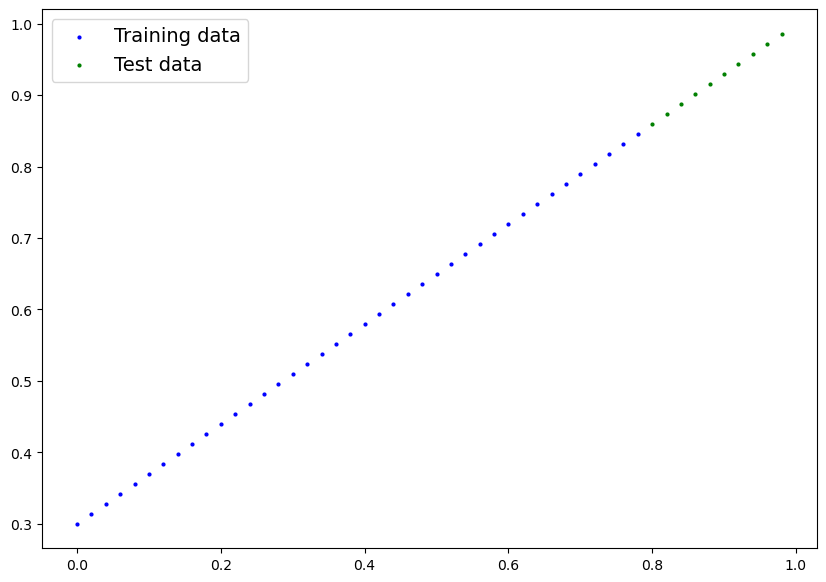

In [24]:
def plot_predictions(
        train_data=X_train,
        train_labels=y_train,
        test_data=X_test,
        test_labels=y_test,
        predictions=None):
    """Plots training data, test data, and compares predictions."""
    plt.figure(figsize=(10, 7))
    
    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
    # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label="Test data")
    # Plot predictions if present
    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
        
    plt.legend(prop={"size": 14})
    
plot_predictions()

## 2. Build model
`requires_grad=True` is set by default and tells PyTorch to track the gradients for this parameter with `torch.autograd()` which is PyTorch's 
implementation for gradient computation.

See: https://pytorch.org/docs/stable/generated/torch.nn.Module.html

In [25]:
# Create a linear regression model class
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        
        # Initialize model parameters
        self.weight = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        
    # Define the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weight * x + self.bias

### PyTorch model building essentials
* `torch.nn` - contains all of the building blocks for computational graphs (a neural network can be considered a computational graph)
* `torch.nn.Parameter` - what parameters should our model try and learn, often a PyTorch layer from `torch.nn` will set these for us
* `torch.nn.Module` - base class for all neural network building blocks. When implementing a custom neural network module, we have to implement 
the `__inti__()` and `forward()` methods. In the `__init__()` method we must call the constructor of the superclass (`nn.Module`) and define 
and initialize 
the 
parameters of the neural network module. All modules need to overwrite the `forward()` method.
See: https://pytorch.org/docs/stable/generated/torch.nn.Module.html
* `torch.optim` - this is where the optimizers in PyTorch live, e.g., gradient descent.
`requires_grad=True` is set by default and tells PyTorch to track the gradients for this parameter with `torch.autograd()` which is PyTorch's 
implementation for gradient computation.

PyTorch Cheat Sheet: https://pytorch.org/tutorials/beginner/ptcheat.html


### Checking the contents of our model
To check what's inside our model we can use `nn.Moduel.parameters()`.

In [89]:
# Create random seed
torch.manual_seed(42)

# Create a model
model_0 = LinearRegressionModel()

# Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [90]:
# List named parameters
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making predictions using `torch.inference_mode()`
To check our model's predictive power, let's see how well it predicts `y_test` given `X_test`.

We pass data through the model, it's going to run it through the `forward()` method.

In [91]:
with torch.inference_mode():
    y_pred = model_0(X_test)
    
y_pred

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

Running PyTorch code with `torch.inference_mode()` stops PyTorch from tracking the gradient. The `torch.inference_mode()`is new at the time of 
writing. Legacy code might use `torch.no_grad()`instead.

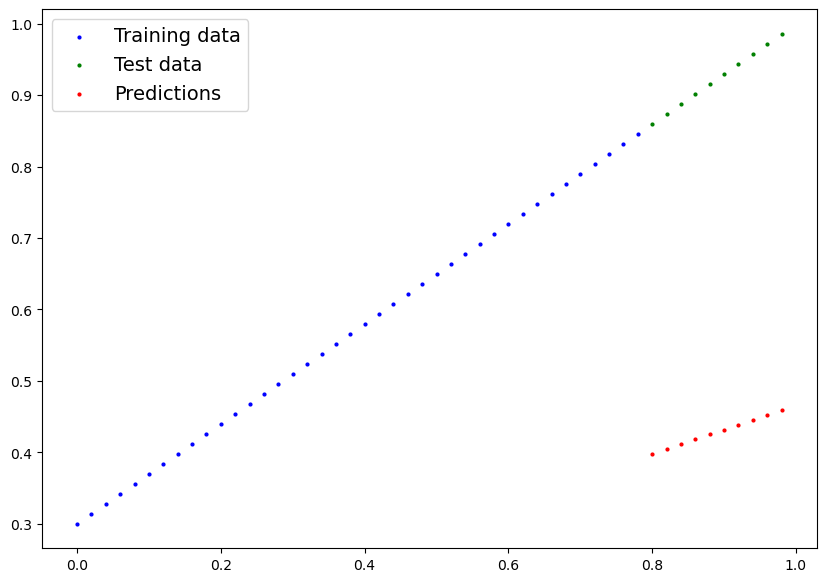

In [92]:
plot_predictions(predictions=y_pred)

Because the model is initialized with random parameters, the models likely are way off from the ground truth parameters. An *ideal model* will 
exactly replicate the ground truth parameters.

## 3. Train model
During training, we update the model's parameters to better represent the data. One way to measure how poor the model's predictions is to use a 
**loss function**. The **optimizer** will take the loss of the model into account and update the model's parameters to minimize the loss function 
on the training data.

**Note:** See *empirical risk minimization* (ERM) and *probably approximately correct* (PAC) learning for the theoretical foundations of why and to 
what 
extent Machine Learning works.

In [93]:
# Pick loss function (mean absolute error, MAE)
loss_fn = nn.L1Loss()

# Pick an optimizer (stochastic gradient descent, SGD)
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)
# Learning rate determines how big the scale of the parameter tweaking. This is a hyperparameter

What loss function and optimizer to pick? This depends on the problem and will become clearer with experience and reading literature.

### Building a training loop (and testing loop) in PyTorch
Common components of a training loop:
0. Loop through data
1. Forwards pass 
2. Calculate the loss
3. Reset gradients of all optimizers
4. Backpropagation of the loss
5. Update of the parameters

In [94]:
epochs = 200  # Number of complete loops over data. This is a hyperparameter

epoch_count = []
loss_values = []
test_loss_values = []

# 0. Loop through data
for epoch in range(epochs):
    # Training
    model_0.train() # train mode tells PyTorch to track the gradients of the model parameters
    
    # 1. Forward pass
    y_pred = model_0(X_train)
    
    # 2. Calculate loss
    loss = loss_fn(y_pred, y_train)
    
    # 3. Reset gradients of all optimizers, by default, optimizers will accumulate the gradients
    optimizer.zero_grad()
    
    # 4. Perform backpropagation
    loss.backward()
    
    # 5. Update model parameters
    optimizer.step()
    
    # Testing
    model_0.eval()  # turns off different setting not needed for evaluation (e.g., drop out layers, batch norm layers,...)
    with torch.inference_mode():    # turns off gradient tracking
        # 1. Forward pass
        test_pred = model_0(X_test)
        
        # 2. Calculate test loss
        test_loss = loss_fn(test_pred, y_test)
    
    if epoch % 10 == 0:
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        print(f"Epoch: {epoch}")
        print(f"Training loss: {loss} | Test loss: {test_loss}")
        print(f"{model_0.state_dict()}\n")

Epoch: 0
Training loss: 0.31288138031959534 | Test loss: 0.48106518387794495
OrderedDict([('weight', tensor([0.3406])), ('bias', tensor([0.1388]))])

Epoch: 10
Training loss: 0.1976713240146637 | Test loss: 0.3463551998138428
OrderedDict([('weight', tensor([0.3796])), ('bias', tensor([0.2388]))])

Epoch: 20
Training loss: 0.08908725529909134 | Test loss: 0.21729660034179688
OrderedDict([('weight', tensor([0.4184])), ('bias', tensor([0.3333]))])

Epoch: 30
Training loss: 0.053148526698350906 | Test loss: 0.14464017748832703
OrderedDict([('weight', tensor([0.4512])), ('bias', tensor([0.3768]))])

Epoch: 40
Training loss: 0.04543796554207802 | Test loss: 0.11360953003168106
OrderedDict([('weight', tensor([0.4748])), ('bias', tensor([0.3868]))])

Epoch: 50
Training loss: 0.04167863354086876 | Test loss: 0.09919948130846024
OrderedDict([('weight', tensor([0.4938])), ('bias', tensor([0.3843]))])

Epoch: 60
Training loss: 0.03818932920694351 | Test loss: 0.08886633068323135
OrderedDict([('wei

In [ ]:
with torch.inference_mode():
    y_pred_new = model_0(X_test)
    plot_predictions(predictions=y_pred_new)

In [ ]:
# Plot the loss values
plt.plot(epoch_count, torch.tensor(loss_values).numpy(), label="Training loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

## 4. Saving a model in PyTorch

There are three main methods for saving and loading models in PyTorch:
1. `torch.save()` - allows you to save a PyTorch object in Python's pickle format
2. `torch.load()` - allows you to load a saved PyTorch object
3. `torch.nn.Modules.load_state_dict()` - allows to load a model's saved state dictionary

Reference: https://pytorch.org/tutorials/beginner/saving_loading_models.html

In [100]:
# Saving our PyTorch model
from pathlib import Path

# 1. Create model dictionary
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving the model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

Saving the model to: models\01_pytorch_workflow_model_0.pth


In [102]:
# !ls -l models

### Loading a PyTorch model
Since we saved our model's `state_dict()` rather than the entire model, we'll create a new instance of our model class and load the saved 
`state_dict()` into it.

In [107]:
# To load the saved stated_dict we first have to instantiate a new object of our model class
loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict of model_0 (this will update the new instance with provided parameters)
loaded_model_0.load_state_dict(torch.load(MODEL_SAVE_PATH))

<All keys matched successfully>

In [108]:
loaded_model_0.state_dict(), model_0.state_dict()

(OrderedDict([('weight', tensor([0.6990])), ('bias', tensor([0.3093]))]),
 OrderedDict([('weight', tensor([0.6990])), ('bias', tensor([0.3093]))]))

In [111]:
# Make some predictions with the loaded model
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_pred = loaded_model_0(X_test)
    original_model_pred = model_0(X_test)
loaded_model_pred.mT, original_model_pred.mT, (loaded_model_pred == original_model_pred).mT

(tensor([[0.8685, 0.8825, 0.8965, 0.9105, 0.9245, 0.9384, 0.9524, 0.9664, 0.9804,
          0.9944]]),
 tensor([[0.8685, 0.8825, 0.8965, 0.9105, 0.9245, 0.9384, 0.9524, 0.9664, 0.9804,
          0.9944]]),
 tensor([[True, True, True, True, True, True, True, True, True, True]]))

## 5. Putting it all together

In [113]:
# Create device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

### 6.1 Data
We will use the same dummy-dataset as before.

### 6.2 Build a linear PyTorch model

In [114]:
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        # This time us a linear layer (fully connected layer) instead of instantiating the parameters manually
        self.linear = nn.Linear(in_features=1, out_features=1, bias=True)
        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear(x)

torch.manual_seed(42)
model_1 = LinearRegressionModelV2()

model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear.weight', tensor([[0.7645]])),
              ('linear.bias', tensor([0.8300]))]))

In [115]:
# Check the model current device
next(model_1.parameters()).device

device(type='cpu')

In [117]:
# Set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cpu')

### 6.3 Training
For training we need:
1. A loss function
2. An optimizer
3. A training loop

In [118]:
# Reuse loss function from previous example
optimizer_1 = torch.optim.SGD(params=model_1.parameters(), lr=0.01)

In [119]:
torch.manual_seed(42)

# Put data on the target device
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

epoch_count_1 = []
loss_values_1 = []
test_loss_values_1 = []

epochs = 200

for epoch in range(epochs):
    model_1.train()
    y_pred_1 = model_1(X_train)
    loss_1 = loss_fn(y_pred_1, y_train)
    optimizer_1.zero_grad()
    loss_1.backward()
    optimizer_1.step()
    
    model_1.eval()
    with torch.inference_mode():
        test_pred_1 = model_1(X_test)
        test_loss_1 = loss_fn(test_pred_1, y_test)
    
    if epoch % 10 == 0:
        epoch_count_1.append(epoch)
        loss_values_1.append(loss_1)
        test_loss_values_1.append(test_loss_1)
        
        print(f"""
            Epoch: {epoch} | Training loss: {loss_1} | Test loss: {test_loss_1}
            {model_1.state_dict()}
        """)


            Epoch: 0 | Training loss: 0.5551779866218567 | Test loss: 0.5739762187004089
            OrderedDict([('linear.weight', tensor([[0.7606]])), ('linear.bias', tensor([0.8200]))])
        

            Epoch: 10 | Training loss: 0.4399680495262146 | Test loss: 0.4392663538455963
            OrderedDict([('linear.weight', tensor([[0.7216]])), ('linear.bias', tensor([0.7200]))])
        

            Epoch: 20 | Training loss: 0.3247582018375397 | Test loss: 0.30455657839775085
            OrderedDict([('linear.weight', tensor([[0.6826]])), ('linear.bias', tensor([0.6200]))])
        

            Epoch: 30 | Training loss: 0.20954827964305878 | Test loss: 0.16984674334526062
            OrderedDict([('linear.weight', tensor([[0.6436]])), ('linear.bias', tensor([0.5200]))])
        

            Epoch: 40 | Training loss: 0.09433844685554504 | Test loss: 0.03513689711689949
            OrderedDict([('linear.weight', tensor([[0.6046]])), ('linear.bias', tensor([0.4200]))])
     

### 6.4 Evaluate predictions

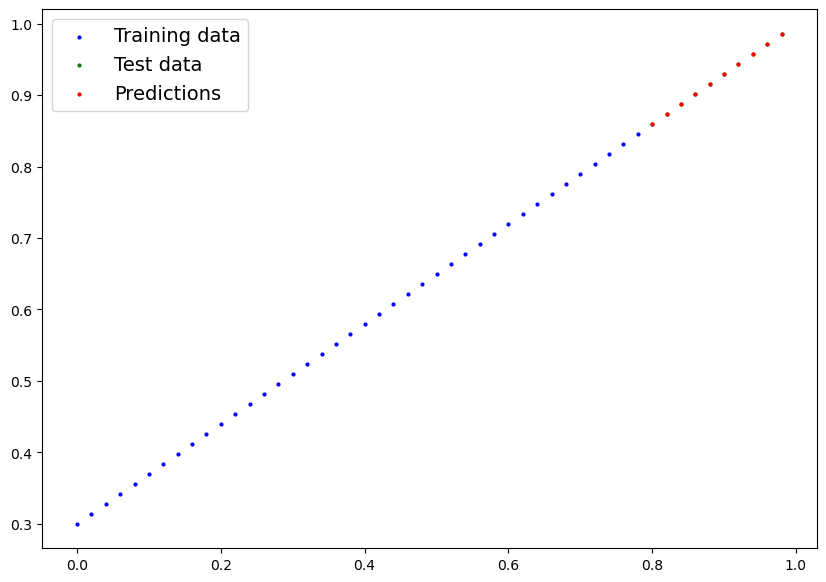

In [121]:
plot_predictions(predictions=test_pred_1.cpu())

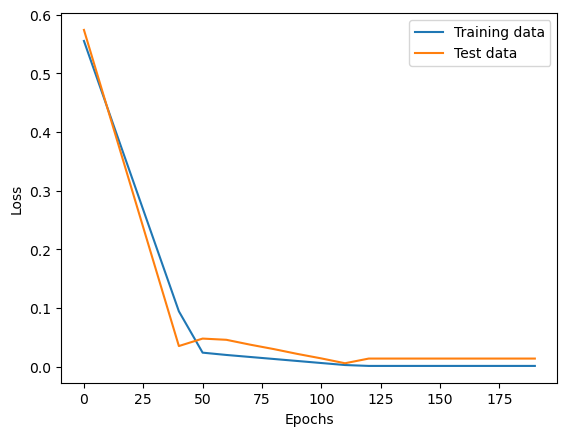

In [122]:
# Plot learning curves
plt.plot(epoch_count_1, torch.tensor(loss_values_1).numpy(), label="Training data")
plt.plot(epoch_count_1, test_loss_values_1, label="Test data")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

### 6.5 Save and load model

In [123]:
# Save model
MODEL_NAME_1 = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH_1 = MODEL_PATH / MODEL_NAME_1

torch.save(model_1.state_dict(), MODEL_SAVE_PATH_1)

# Load model
loaded_model_1 = LinearRegressionModelV2()
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH_1))

<All keys matched successfully>

In [124]:
loaded_model_1.eval()
with torch.inference_mode():
    loaded_model_pred_1 = loaded_model_1(X_test)
    original_model_pred_1 = model_1(X_test)

loaded_model_pred_1.mT, original_model_pred_1.mT, (loaded_model_pred_1 == original_model_pred_1).mT

(tensor([[0.8600, 0.8739, 0.8878, 0.9018, 0.9157, 0.9296, 0.9436, 0.9575, 0.9714,
          0.9854]]),
 tensor([[0.8600, 0.8739, 0.8878, 0.9018, 0.9157, 0.9296, 0.9436, 0.9575, 0.9714,
          0.9854]]),
 tensor([[True, True, True, True, True, True, True, True, True, True]]))